<p style='color:blue; font-size:32px; text-align:center'> 
    <strong> Brief projet : Marketing ; identifier les clients cibles (Clustering K-Means) </strong>
</p>
<p style='color:blue; font-size:24px; text-align:center'>le 25/03/2022 </p>

                                                                                      Par Aïssa

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Contexte du projet**
 <p style="color:#4caba9;">Le directeur d'une grande chaîne de magasins fait appel à vos services pour que vous aidiez l'équipe marketing à déterminer la stratégie commerciale la meilleure. Pour ce faire, vous devez réaliser une segmentation de la clientèle , c'est à dire identifier les catégories de clients les plus à même de consommer, et comprendre leur comportements d'achats. Vous disposez d'une base de données des clients abonnés avec des informations basiques telles que :  le numéro client, l'âge, le sexe, le revenu annuel et le score de dépenses (indice de consommation de 1-100.</p>

# PARTIE 1 : Phase exploratoire : visualisation et analyse du jeu de donnée

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Sommaire**
 <p style="color:#4caba9;"> 
✔ 1/ Import des librairies nécessaires  <br>
✔ 2/ Examion les données <br>
✔ 3/ Regardons la distribution des données. <br>
✔ 4/ Analyse de genre<br>
✔ Prédictions <br>
✔ Evaluation du modèle <br>
</p>

## 1/ Import des librairies nécessaires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 2/ Examions les données

In [3]:
# Import du fichier csv
df = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/6b1ca02d-1c66-4783-b237-8fe0c2dea791.csv")

In [157]:
# observation brut du dataset
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [159]:
# voyons si noous avons des données null ou NaN.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [156]:
# Voyans les corrélation possible avec les features.Via un tableau.
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


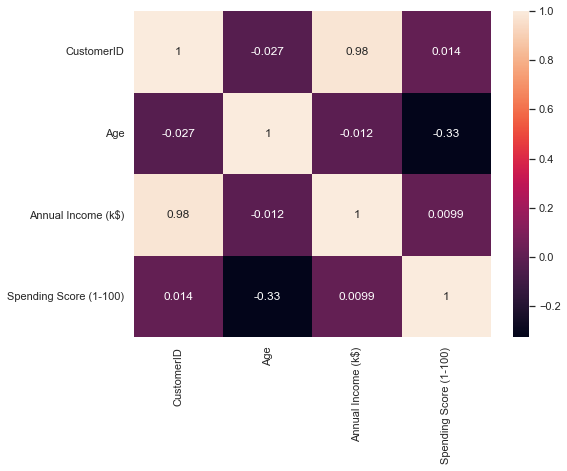

In [160]:
# Voyans les corrélation possible avec les features.Via un plot.
df.corr()
corr_df =df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## 3/ Regardons la distribution des données.

##### Répartition annuelle des revenus :

C:\Users\Utilisateur\anaconda3\newanaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Compter')

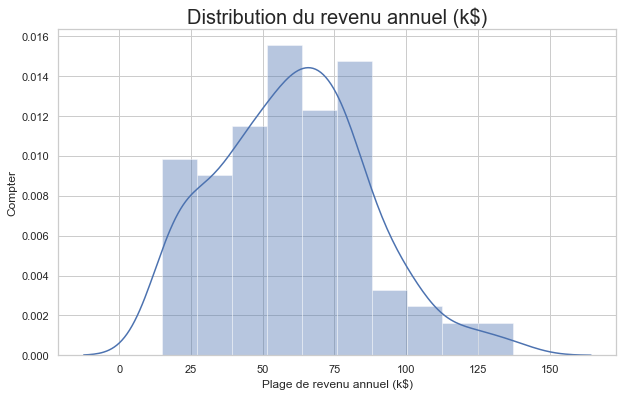

In [163]:
#Répartition des revenus annuels
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution du revenu annuel (k$)', fontsize = 20)
plt.xlabel('Plage de revenu annuel (k$)')
plt.ylabel('Compter')

##### Répartition par âge:

C:\Users\Utilisateur\anaconda3\newanaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Compter')

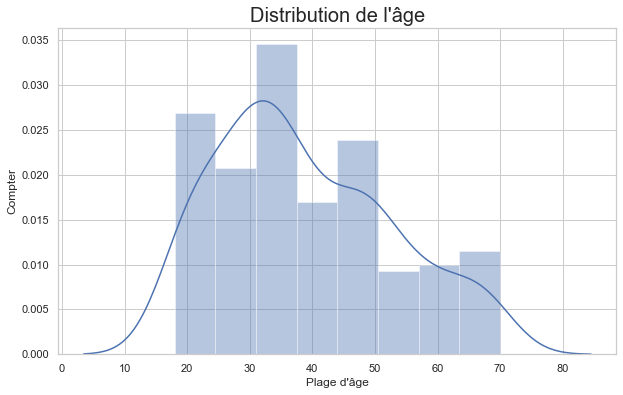

In [161]:
#Répartition de l'âge
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title("Distribution de l'âge", fontsize = 20)
plt.xlabel("Plage d'âge")
plt.ylabel('Compter')

##### Répartition des notes de dépenses :

C:\Users\Utilisateur\anaconda3\newanaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Compter')

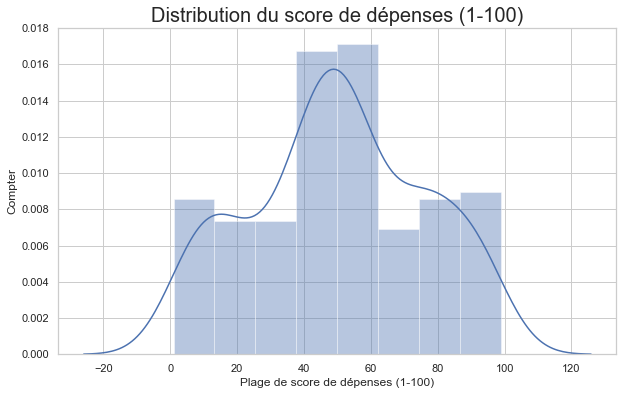

In [165]:
# Répartition du score de dépenses
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution du score de dépenses (1-100)', fontsize = 20)
plt.xlabel('Plage de score de dépenses (1-100)')
plt.ylabel('Compter')

## 4/ Analyse de genre

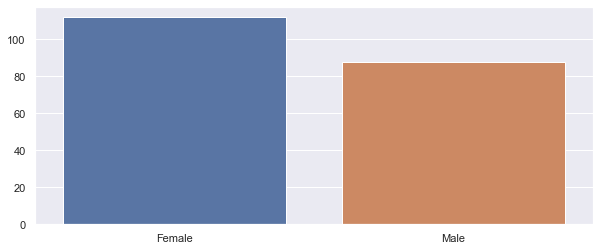

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [11]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [120]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


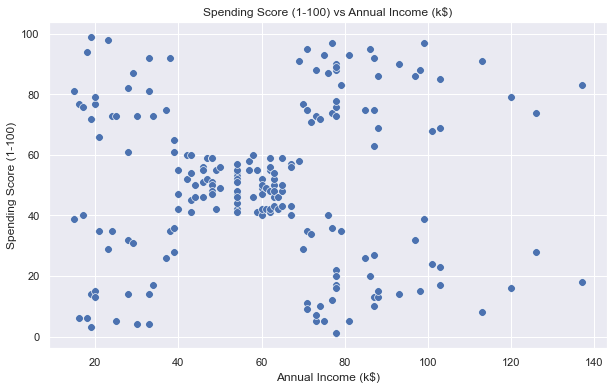

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [122]:
from sklearn.cluster import KMeans

In [123]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\Utilisateur\anaconda3\newanaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


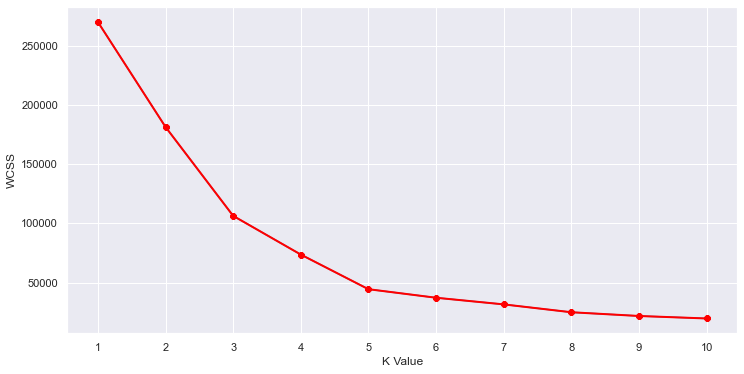

In [124]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [12]:
km1=KMeans(n_clusters=5)
#Ajustement des données d'entrée
km1.fit(X)
#prédire les étiquettes des données d'entrée
y=km1.predict(X)
#ajouter les étiquettes à une colonne nommée étiquette
df1["label"] = y
#Le nouveau dataframe avec le clustering fait
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


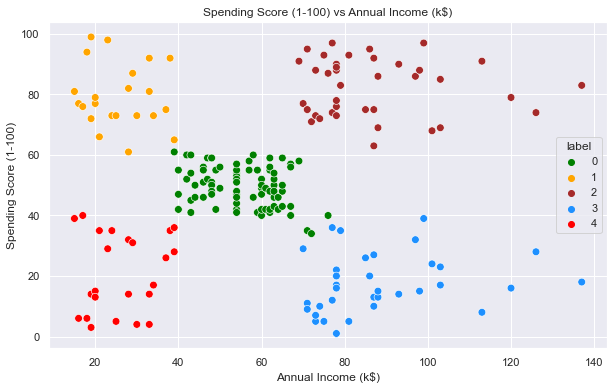

In [126]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

C:\Users\Utilisateur\anaconda3\newanaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


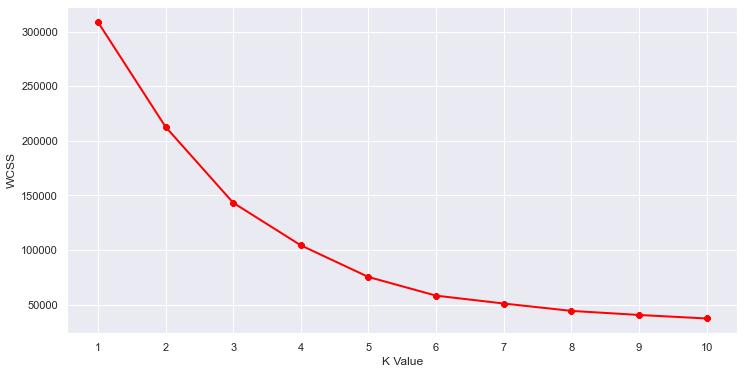

In [131]:
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Maintenant, nous calculons la somme des erreurs quadratiques (WSS) intra-cluster pour différentes valeurs de k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [133]:
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df["label"] = y2
#The data with labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,8
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,8


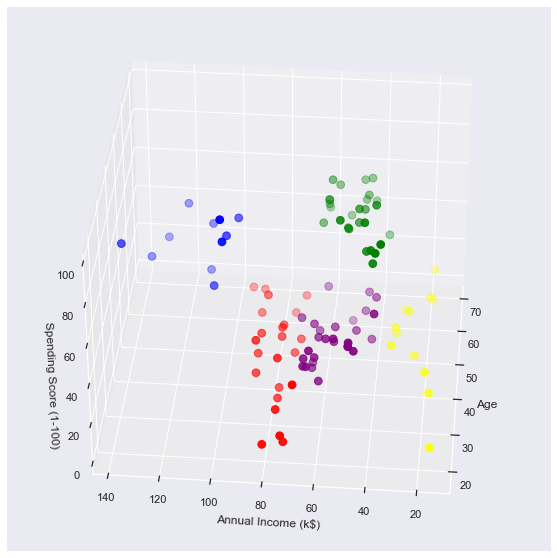

In [134]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [135]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 23
They are - [125 129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169
 171 173 175 177 179]
--------------------------------------------
Number of customer in 2nd group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 27
They are - [ 44  46  48  52  53  59  62  66  69  70  76  79  85  88  89  92  96  98
 100 101 104 106 112 114 115 116 121]
--------------------------------------------
Number of customer in 4th group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 5th group= 12
They are - [ 3  7  9 11 13 15 23 25 31 33 35 37]
--------------------------------------------


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [20]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# enc = OneHotEncoder(handle_unknown='ignore')
# ct = ColumnTransformer([('onehot',enc,[1])],remainder="passthrough")
# df_t = ct.fit_transform(df)

In [6]:
df_coded = df.replace('Female',0).replace('Male',1)
df_coded

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [7]:
X = pd.DataFrame(df_coded)

In [99]:
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
model.predict(X)
model.cluster_centers_

array([[ 50.        ,   0.4040404 ,  39.94949495,  39.34343434,
         49.93939394],
       [150.        ,   0.47524752,  37.77227723,  81.35643564,
         50.45544554]])

In [101]:
 model.inertia_

387065.7137713772

In [102]:
model.score(X)

-387065.7137713772

In [9]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

TypeError: '(slice(None, None, None), 0)' is an invalid key